this notebook does some spot checking on learned weight patterns in `scripts/training/yuanyuan_8k_a_3day/feature_approximation/local_pcn_recurrent/submit_sep2.py`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [3]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [4]:
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20200218 as param_iterator_obj,
    keygen
)

In [5]:
from numpy.linalg import norm
import numpy as np

In [6]:
from pickle import load

In [7]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [8]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'scripts+yuanyuan_8k_a_3day+maskcnn_polished_with_rcnn_k_bl+20200218',
                    'pca')
}

In [9]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [10]:
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(
    ('042318', '043018','051018',))
                           )
assert cc_max_all_neurons.shape == (79,)

In [11]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
            
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [12]:
def collect_all(cls_set):
    save_dir = global_vars['save_dir']
    count = 0
    
    for idx, param in enumerate(param_iterator_obj().generate()):
        
        if param['rcnn_bl_cls'] not in cls_set:
            # ignore cls=1,2 models.
            continue
            
        if param['kernel_size_l23'] in {3,5}:
            # too small.
            continue
    
    
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        result = load_training_results(key, return_model=False, return_checkpoint=True)
        cc_raw = np.asarray(result['stats_best']['stats']['test']['corr'])
        assert cc_raw.shape == (79,)
        # load loss curve to make sure we are good in approximation.
        corr_test = ((cc_raw/cc_max_all_neurons)**2).mean()
        # only keep 0.6+ models
        if corr_test < 0.62:
            continue
        
        count += 1
        
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        # show some results.
        verbose = count % 5 == 0
        
        if verbose:
            print(count, key, corr_test)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


5 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lmse/m_se0 0.6255123301789174
lateral
[0.22760257 0.36368371 0.44183901 0.50914102 0.56364229 0.61392084
 0.6586343  0.70173875 0.73634838 0.76476647 0.78891694 0.81050825
 0.83002603 0.84565203 0.85957011 0.87083442 0.88067277 0.89010863
 0.89826011 0.9061504 ]


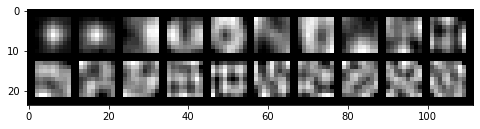

ff
[0.12477241 0.23294082 0.30300103 0.3668379  0.42224616 0.46890251
 0.50765782 0.54220032 0.57363499 0.60398387 0.63265073 0.65825517
 0.68255075 0.70614387 0.72745401 0.74695889 0.76415774 0.77967545
 0.79459917 0.80828215]


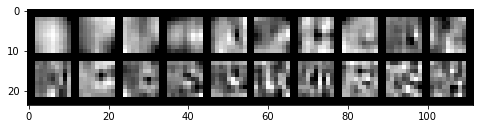

10 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se0 0.6514064051375749
lateral
[0.27681662 0.40589442 0.5175973  0.59094065 0.65524389 0.715629
 0.76047232 0.78889896 0.81442932 0.83745546 0.85480776 0.86955678
 0.88285862 0.89214234 0.90086209 0.90811766 0.91395637 0.91948522
 0.92482334 0.92943803]


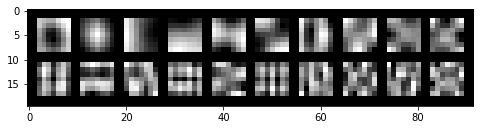

ff
[0.14699348 0.27131545 0.35660123 0.43659234 0.50242312 0.55875351
 0.60030382 0.6362177  0.66682174 0.6946563  0.7192633  0.74068749
 0.76017601 0.7774111  0.79160071 0.80535433 0.81827926 0.83004812
 0.8415286  0.85205381]


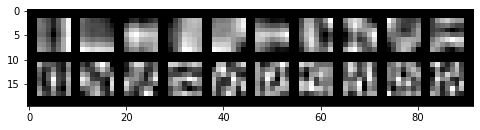

15 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lmse/m_se0 0.6459374188630677
lateral
[0.20426964 0.3212467  0.4135382  0.49111181 0.55268545 0.61280443
 0.65870876 0.6963022  0.73246689 0.76301277 0.7874856  0.80938319
 0.82918691 0.84211178 0.85439679 0.86615201 0.87704961 0.88622873
 0.89307462 0.89961094]


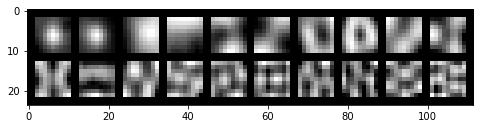

ff
[0.16325116 0.25457997 0.33691663 0.40608694 0.45974236 0.50623219
 0.5470938  0.58026571 0.6115823  0.63985082 0.66625577 0.68734525
 0.70628911 0.72450979 0.74155313 0.75660164 0.7708121  0.78450616
 0.79592574 0.80621526]


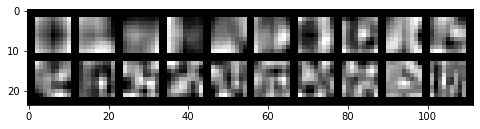

20 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se0 0.6363475256105169
lateral
[0.25163755 0.39643431 0.50593175 0.60905977 0.66537659 0.71622029
 0.74731217 0.77471164 0.79631379 0.81164458 0.82625096 0.83937568
 0.85157177 0.86002253 0.8679736  0.87538964 0.88234425 0.88894664
 0.89482135 0.90041229]


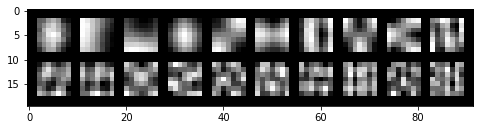

ff
[0.12798657 0.23022945 0.32445647 0.40672813 0.46653515 0.51917073
 0.56819428 0.61156968 0.65021553 0.68128119 0.70910971 0.73233646
 0.7529982  0.77172825 0.7876388  0.80159659 0.81425864 0.82636724
 0.83670555 0.8464948 ]


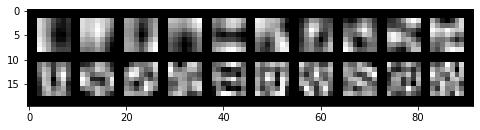

25 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6226618570759725
lateral
[0.26493311 0.44170575 0.55293105 0.62484282 0.68624709 0.73726536
 0.77133036 0.802067   0.82985994 0.85353909 0.8745328  0.89263794
 0.90604262 0.91772303 0.92621526 0.93293092 0.93923413 0.94428795
 0.94877198 0.95299592]


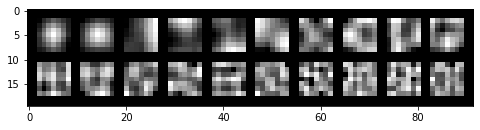

ff
[0.17161765 0.2750012  0.36753205 0.45484297 0.52316107 0.58506311
 0.63477068 0.67038669 0.70378767 0.73496041 0.76391626 0.78651317
 0.80789492 0.82706959 0.84388469 0.8576601  0.87096047 0.88296242
 0.89340025 0.9026679 ]


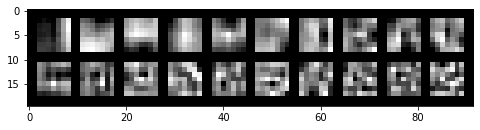

30 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lpoisson/m_se0 0.6227733572856736
lateral
[0.20502323 0.33423047 0.43819976 0.53708367 0.60054431 0.65808545
 0.7039503  0.73636629 0.76379135 0.78660565 0.80871801 0.82635613
 0.84214451 0.85440179 0.86609323 0.87649525 0.8853064  0.89298455
 0.89953337 0.90548041]


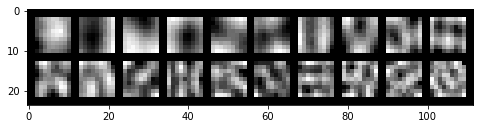

ff
[0.12235693 0.20923233 0.28259607 0.34733014 0.40452826 0.4561771
 0.50219862 0.53771267 0.57172693 0.6003845  0.62637257 0.65109936
 0.67332727 0.69536289 0.7150524  0.73360669 0.75106197 0.76545678
 0.77968845 0.79362671]


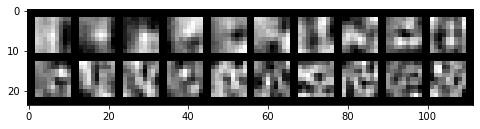

35 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lpoisson/m_se0 0.6272925866099853
lateral
[0.25625099 0.39187496 0.49392127 0.56501592 0.61924424 0.67116227
 0.71218484 0.75040265 0.77705097 0.8014757  0.82277145 0.8419143
 0.8558077  0.86621395 0.87563457 0.88364825 0.8903354  0.89640609
 0.90169531 0.90642257]


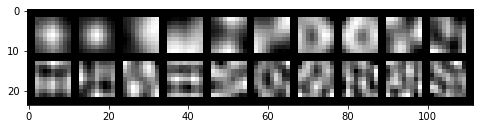

ff
[0.13528497 0.24504639 0.33960709 0.42134021 0.48297176 0.54197697
 0.57496336 0.60441271 0.63312011 0.65895286 0.68392872 0.70441633
 0.72378448 0.7414395  0.75784353 0.77198198 0.78478425 0.79642387
 0.80769316 0.81841142]


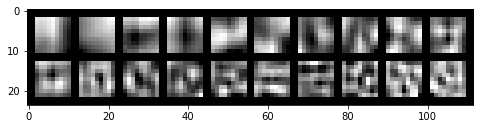

40 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6443632281232486
lateral
[0.23426578 0.38646518 0.51192721 0.61179182 0.68545056 0.74815874
 0.78949316 0.82103238 0.8489696  0.86648196 0.88189763 0.89582808
 0.90859291 0.91885754 0.92566028 0.93204236 0.93800179 0.94294773
 0.94768584 0.95148277]


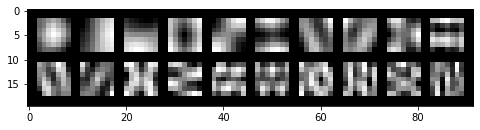

ff
[0.15270187 0.28154684 0.3847824  0.48166215 0.54855624 0.60547643
 0.65172561 0.68663739 0.71772301 0.74583319 0.77253341 0.79393182
 0.81275257 0.82798619 0.84181287 0.85469161 0.86570934 0.87603117
 0.8846197  0.89292602]


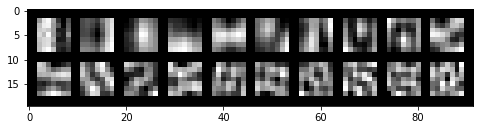

45 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se0 0.62617585331225
lateral
[0.26606715 0.41765809 0.52810893 0.59772953 0.66088276 0.71709944
 0.75987686 0.79288646 0.82325899 0.85344644 0.8764101  0.89397322
 0.90776518 0.9204603  0.92905426 0.93673575 0.94409727 0.95010435
 0.95519265 0.95899752]


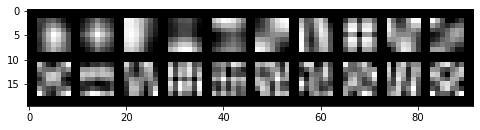

ff
[0.21915662 0.37645044 0.47087785 0.54837796 0.60808452 0.64733534
 0.68457989 0.71838053 0.74916872 0.77285711 0.79439592 0.81166199
 0.8275883  0.84015475 0.85185455 0.86285794 0.87270129 0.88221418
 0.89023801 0.89798674]


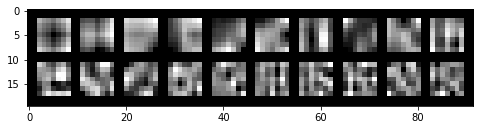

50 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.632367082158698
lateral
[0.22646644 0.34121848 0.42071426 0.48888397 0.54773903 0.59572199
 0.64025424 0.683868   0.72394689 0.75885687 0.78806217 0.812099
 0.83306268 0.85246377 0.86887963 0.883667   0.89562988 0.9063526
 0.91670823 0.92545088]


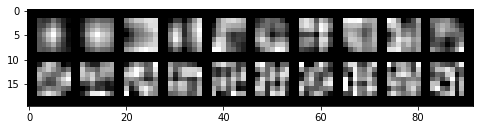

ff
[0.21648303 0.33533872 0.41045249 0.47889025 0.53641794 0.58324471
 0.62168327 0.65566734 0.68791947 0.71459778 0.73745904 0.75823263
 0.776815   0.79400227 0.81039535 0.82606381 0.84100852 0.85502076
 0.86748298 0.87820472]


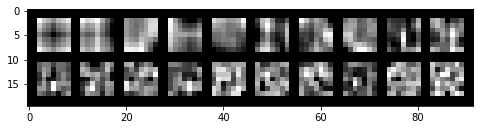

55 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6418870724479459
lateral
[0.27873916 0.43016767 0.529678   0.61371294 0.67964929 0.72653227
 0.76902104 0.7979869  0.82305    0.84750249 0.86854643 0.88614745
 0.89800181 0.90780129 0.91688213 0.92438441 0.93043581 0.93625037
 0.9416284  0.94672265]


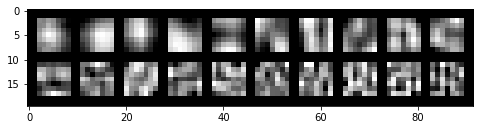

ff
[0.19573064 0.2984136  0.37436567 0.4398291  0.50047941 0.55083538
 0.59019096 0.62774733 0.65838711 0.68675646 0.71264196 0.7371786
 0.75910303 0.77957043 0.79836719 0.81536428 0.83136418 0.84578701
 0.85829618 0.87021512]


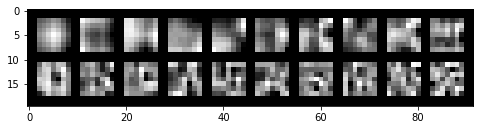

60 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6404203599109668
lateral
[0.29492948 0.4479462  0.56234025 0.62893104 0.68938297 0.73547564
 0.7742805  0.80749063 0.83193643 0.85436157 0.87449432 0.88982314
 0.9012612  0.91086019 0.91870762 0.92625001 0.93143408 0.93659081
 0.94111196 0.94547997]


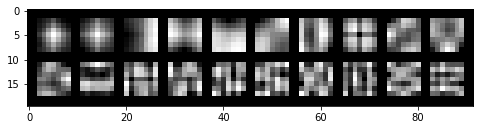

ff
[0.24797622 0.37440211 0.47744234 0.54057351 0.59208762 0.63864513
 0.68070301 0.71092554 0.73928582 0.76318234 0.78254223 0.79938078
 0.81408772 0.82645294 0.83772841 0.84786041 0.85793982 0.86670321
 0.87489516 0.88275321]


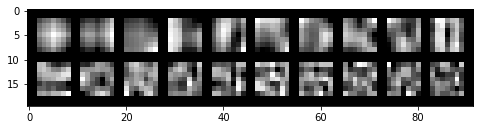

65 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6478255482982895
lateral
[0.28497008 0.42933536 0.5558647  0.64865706 0.70843529 0.75965574
 0.79363072 0.81856706 0.8405905  0.85930319 0.87403197 0.88661226
 0.89762277 0.90535979 0.91229449 0.91810872 0.92314791 0.92797472
 0.9321729  0.93615559]


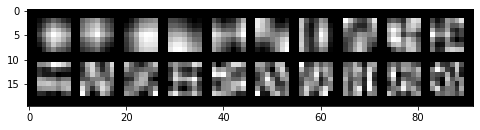

ff
[0.17090068 0.28795018 0.38899444 0.46813219 0.52703479 0.57939089
 0.62278729 0.6597297  0.69057325 0.71870489 0.74327412 0.76393065
 0.78213847 0.79709994 0.81125437 0.82376943 0.83523507 0.84571295
 0.85480187 0.86344449]


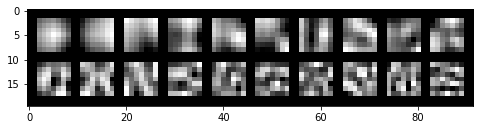

70 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.629201836675654
lateral
[0.22508893 0.37984873 0.48351672 0.56029135 0.62588199 0.68435139
 0.73611244 0.7748618  0.80599499 0.83603247 0.8582897  0.87472483
 0.88927251 0.89967188 0.909881   0.91942282 0.9265444  0.93343786
 0.93933675 0.94404055]


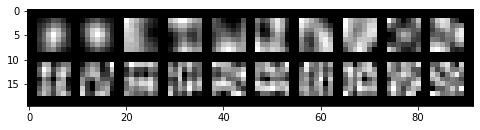

ff
[0.16127472 0.26111874 0.36016317 0.4409625  0.50831157 0.5563817
 0.59458904 0.63114439 0.66427834 0.696109   0.72345812 0.75027631
 0.77489863 0.79758715 0.81808436 0.83371112 0.84697153 0.85918586
 0.87108921 0.88085102]


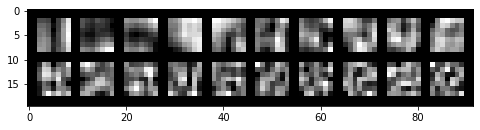

75 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lmse/m_se1 0.6204714534007628
lateral
[0.17621505 0.29611918 0.36759165 0.4257486  0.47885386 0.53045181
 0.57807442 0.6212481  0.65734727 0.69203105 0.72140533 0.74836488
 0.77203456 0.7917369  0.81032796 0.82749234 0.84293748 0.85778736
 0.86960656 0.88059196]


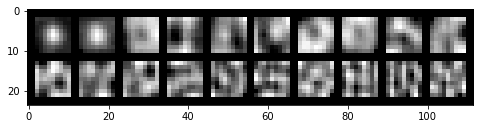

ff
[0.1172284  0.19179528 0.26211096 0.32608117 0.37970111 0.42673863
 0.47056013 0.50918499 0.54217533 0.57387115 0.60213229 0.62897103
 0.65267862 0.67531743 0.69693372 0.71620838 0.73475456 0.75295229
 0.76966152 0.78497999]


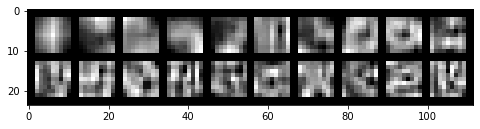

80 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.6274580061342602
lateral
[0.21260734 0.35261623 0.47036731 0.5857693  0.65814288 0.71917817
 0.75928747 0.78688609 0.81000821 0.82952582 0.84816928 0.86324672
 0.87510347 0.88548036 0.89424278 0.90207237 0.90931726 0.91589097
 0.92235121 0.92794635]


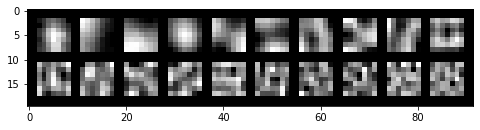

ff
[0.12665655 0.22812614 0.31410865 0.37966495 0.44247326 0.49698945
 0.54122561 0.58168038 0.61953429 0.65077014 0.68058834 0.71009066
 0.7356828  0.75973904 0.78133678 0.80231012 0.82131701 0.83601923
 0.84985682 0.86133971]


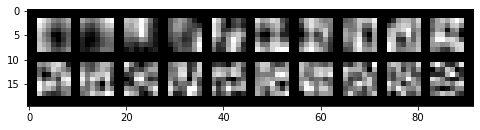

85 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.6484564026192152
lateral
[0.25966793 0.40384784 0.51490775 0.59486536 0.66141573 0.71957755
 0.76021929 0.79316156 0.81831294 0.84044146 0.8577549  0.87229086
 0.88615723 0.89443766 0.90215644 0.90866949 0.91484485 0.92020818
 0.92540854 0.92981808]


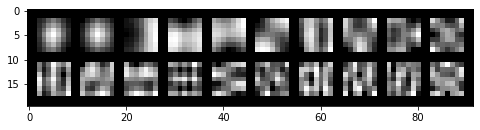

ff
[0.13230833 0.24357977 0.34812918 0.43244418 0.49229465 0.54542934
 0.58819355 0.62764232 0.66195492 0.69156681 0.71775146 0.74022973
 0.75958685 0.77829094 0.79524396 0.80996444 0.82262321 0.83484891
 0.84580069 0.85577865]


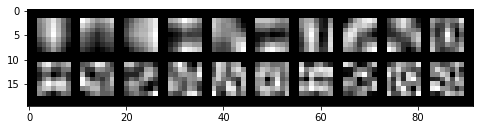

90 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lmse/m_se1 0.6285586513183465
lateral
[0.23609258 0.36968342 0.46757307 0.53641179 0.59556982 0.64930081
 0.69173013 0.72468252 0.75583869 0.78247542 0.80762953 0.82414819
 0.83993585 0.85196257 0.8624791  0.87212986 0.87948263 0.88636817
 0.89244737 0.89809446]


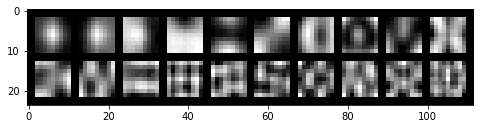

ff
[0.13925628 0.24660405 0.32842747 0.393499   0.44771049 0.49455384
 0.53079733 0.56418299 0.5945165  0.62368587 0.64581348 0.66518079
 0.68287678 0.69931765 0.715452   0.72986458 0.74312214 0.75554847
 0.76716077 0.77758867]


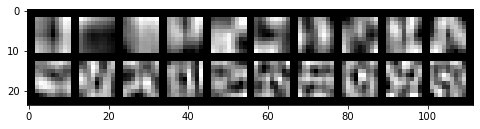

95 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lmse/m_se1 0.6247487091728379
lateral
[0.1994893  0.33970836 0.45256184 0.54400382 0.60839565 0.6602384
 0.70582023 0.74160046 0.76830878 0.79038544 0.80740797 0.8237765
 0.83729143 0.84830508 0.85809116 0.8660481  0.87354092 0.88064167
 0.88695816 0.89240025]


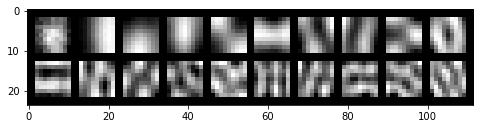

ff
[0.10554358 0.19440971 0.27607794 0.35358731 0.4067554  0.45510211
 0.49624792 0.53420264 0.56577137 0.59616915 0.62335141 0.64743656
 0.66951962 0.69133236 0.7091116  0.72575556 0.7411163  0.75554028
 0.76826592 0.78038872]


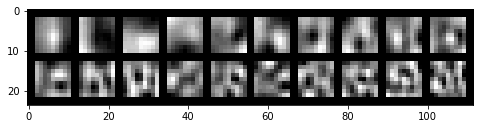

100 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6251191410698792
lateral
[0.28403736 0.42849509 0.54091487 0.6277606  0.6830655  0.73483434
 0.77396286 0.79993559 0.8231684  0.84231296 0.85874995 0.87177448
 0.88294828 0.89242398 0.90118889 0.90867534 0.91515124 0.92089042
 0.92616443 0.93132529]


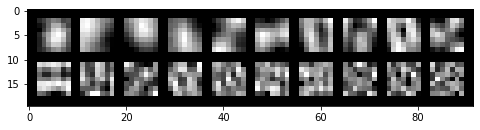

ff
[0.16353348 0.30108584 0.399707   0.48942256 0.56248386 0.6206658
 0.67122583 0.70707089 0.73812189 0.76804734 0.79187011 0.81073827
 0.82828788 0.84491822 0.8581038  0.8703223  0.88179927 0.8915132
 0.90074351 0.90935326]


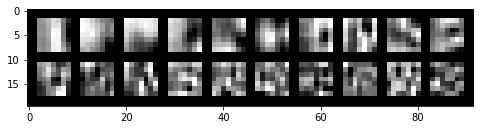

105 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6286176790247522
lateral
[0.28505448 0.41713261 0.53466602 0.6154844  0.68067327 0.7393793
 0.77374459 0.80024336 0.82418319 0.84471075 0.86147577 0.8759327
 0.88624384 0.89500652 0.9021344  0.90764147 0.91301298 0.91824469
 0.92317922 0.92757218]


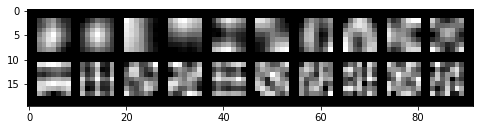

ff
[0.18056433 0.31278505 0.42682523 0.51584855 0.57606678 0.63157424
 0.67481096 0.70982979 0.7432966  0.76908102 0.79321986 0.81111359
 0.82561454 0.83907705 0.85187218 0.86296937 0.87289994 0.88100673
 0.88895834 0.89662968]


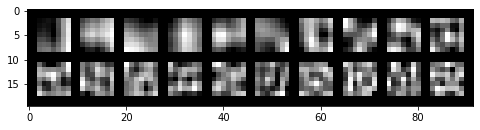

110 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lpoisson/m_se1 0.6288535962197933
lateral
[0.24650877 0.39411973 0.48489677 0.55962753 0.61913556 0.6673264
 0.70866746 0.7438812  0.77025609 0.79337489 0.81175684 0.82940116
 0.84139127 0.85183535 0.86009053 0.86773409 0.87401287 0.87979987
 0.88484334 0.88959905]


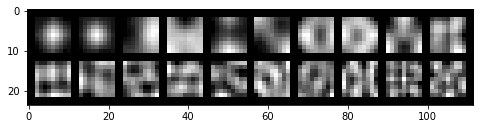

ff
[0.14581232 0.25050396 0.32334135 0.39440869 0.45114104 0.49936187
 0.53475394 0.56554699 0.59515655 0.62345433 0.64637088 0.66744601
 0.68659026 0.70405429 0.72035467 0.73613729 0.75132795 0.76364689
 0.77556092 0.78584324]


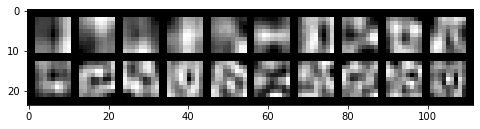

115 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6304407539819661
lateral
[0.23716916 0.37054813 0.47140859 0.54532664 0.59958458 0.64717957
 0.67753773 0.70209864 0.72218389 0.73885066 0.75407814 0.76775388
 0.7805367  0.79177366 0.80154475 0.8109516  0.8193483  0.82731411
 0.83521576 0.84296148]


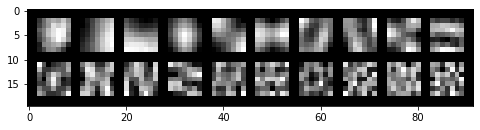

ff
[0.13503051 0.26302834 0.36039347 0.43665255 0.5001323  0.55343326
 0.59623828 0.63293364 0.6616756  0.6874794  0.71137185 0.73138996
 0.75076209 0.76673688 0.78053395 0.79395136 0.80620596 0.81688517
 0.8269011  0.83660337]


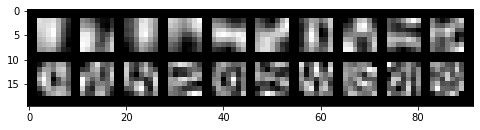

120 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.6294997653386281
lateral
[0.29073993 0.44154469 0.54853441 0.62288789 0.69136508 0.73871613
 0.77853898 0.81156405 0.84117792 0.86668764 0.88606918 0.90139233
 0.91607706 0.9261771  0.93278876 0.93845419 0.94380937 0.9486941
 0.9533074  0.95673862]


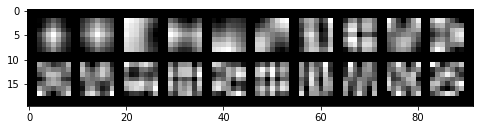

ff
[0.19992865 0.33731033 0.43570947 0.52438834 0.57931348 0.62381547
 0.66193428 0.69900318 0.72906097 0.75655096 0.77859591 0.79806292
 0.81467783 0.82836027 0.84134561 0.85393963 0.86515516 0.87521181
 0.88457131 0.89276857]


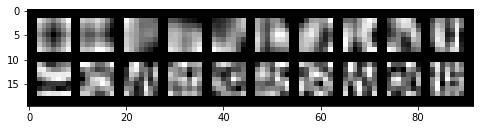

125 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch8/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6212370825268301
lateral
[0.26082345 0.37144559 0.47212858 0.54366385 0.6077181  0.66158506
 0.70850108 0.74636315 0.78199142 0.80729106 0.83030956 0.85153963
 0.87093607 0.8880542  0.90244136 0.91360464 0.92391768 0.93396678
 0.9420711  0.9500747 ]


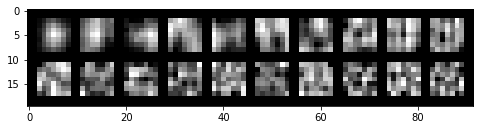

ff
[0.13998085 0.2298308  0.30828079 0.38229469 0.44727499 0.50720859
 0.55715982 0.59966656 0.63949438 0.67547964 0.70819852 0.73835952
 0.7677101  0.79200109 0.81555617 0.83689928 0.85497849 0.87173048
 0.88558203 0.8990246 ]


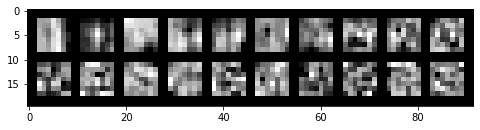

130 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6277969883942877
lateral
[0.28074952 0.42441637 0.53565289 0.64158333 0.70391943 0.74931623
 0.7828433  0.81078906 0.83589401 0.85520432 0.87210205 0.88492282
 0.89634579 0.90619881 0.91505128 0.92200352 0.9284658  0.93376205
 0.93822036 0.94259055]


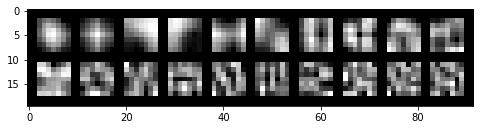

ff
[0.17734721 0.2817795  0.36694738 0.44192333 0.50078486 0.55658329
 0.60900366 0.64815743 0.6843378  0.7154063  0.73881244 0.76143232
 0.78105913 0.79916943 0.81668762 0.8312173  0.84514502 0.85898634
 0.87062948 0.88072561]


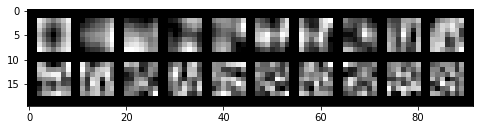

135 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l2/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6373676154286829
lateral
[0.2407505  0.38163536 0.50145139 0.56981205 0.6349168  0.68606707
 0.73073938 0.76561279 0.79660358 0.82538454 0.85040509 0.86836011
 0.8833629  0.89672802 0.90749992 0.91670051 0.9237094  0.93004957
 0.93577042 0.94141648]


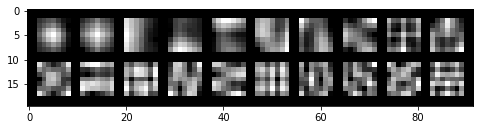

ff
[0.21717508 0.34569934 0.44900081 0.52514522 0.57809144 0.62075477
 0.65347615 0.6855761  0.7131606  0.73716096 0.75969059 0.77814582
 0.79401924 0.80798193 0.82102754 0.83315123 0.84459311 0.85503558
 0.86433152 0.87256792]


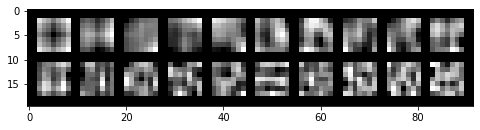

140 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6298183452475108
lateral
[0.28272856 0.42671401 0.56766076 0.6587803  0.71703421 0.76311563
 0.79438532 0.81762258 0.83664017 0.85246642 0.86595537 0.87634142
 0.88484816 0.8921645  0.89828274 0.90394951 0.90903933 0.91395286
 0.91845146 0.92260064]


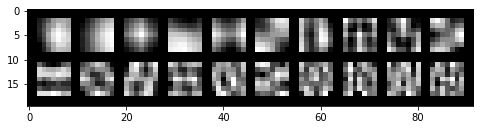

ff
[0.16530975 0.29052184 0.40957521 0.50629412 0.56841754 0.6244776
 0.67640973 0.70866896 0.73877369 0.76299594 0.78425661 0.80334938
 0.81870452 0.83170901 0.84335555 0.85388195 0.86322743 0.87152433
 0.87915109 0.88598662]


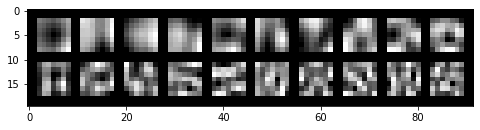

145 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lpoisson/m_se1 0.6261815634250865
lateral
[0.26254915 0.39993756 0.51668703 0.60607961 0.66879853 0.71585082
 0.75265465 0.78373474 0.81029373 0.83228012 0.84891624 0.86281044
 0.8758997  0.88572518 0.89351307 0.90096748 0.90754899 0.91388895
 0.91873114 0.92313231]


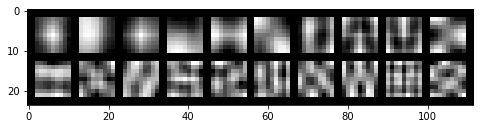

ff
[0.20110101 0.30913073 0.40318632 0.48159319 0.53530517 0.58679694
 0.62860215 0.65661159 0.68330075 0.70893546 0.73029454 0.74909818
 0.76721386 0.78211147 0.79503981 0.80723732 0.81724776 0.82664602
 0.83564863 0.84387087]


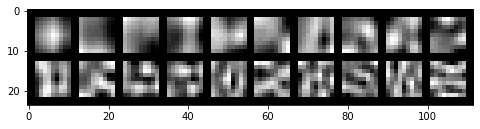

145


In [13]:
collect_all({3,4})